# Regressão Linear Simples com R
* Verificar os pressupostos da regressão linear: relação linear entre as variáveis, normalidade, homocedasticidade, ausência de outliers, independência dos resíduos;
* MOntar e interprtetar o modelo de regressão linear simples;
* Montar um gráfico incluindo a equação da reta;
* Descrever os resultados
---

### Dataset: investimento em publicidade e vendas de CDs por uma gravadora.
Carregamento dos pacotes e dos dados:

In [4]:
library(dplyr)
library(car)
library(ggplot2)
library(rstatix)
library(lmtest)
library(ggpubr)

In [6]:
data = read.csv2("dataset/regressao.csv")
head(data)

Publicidade,Vendas
985.69,120
1445.56,360
1188.19,270
574.51,220
568.95,170
471.81,70


In [7]:
glimpse(data)

Rows: 187
Columns: 2
$ Publicidade <dbl> 985.69, 1445.56, 1188.19, 574.51, 568.95, 471.81, 537.35, ~
$ Vendas      <int> 120, 360, 270, 220, 170, 70, 210, 200, 70, 150, 190, 240, ~


### Verificando a relação das variáveis dependentes (vendas) e independentes (publicidade)


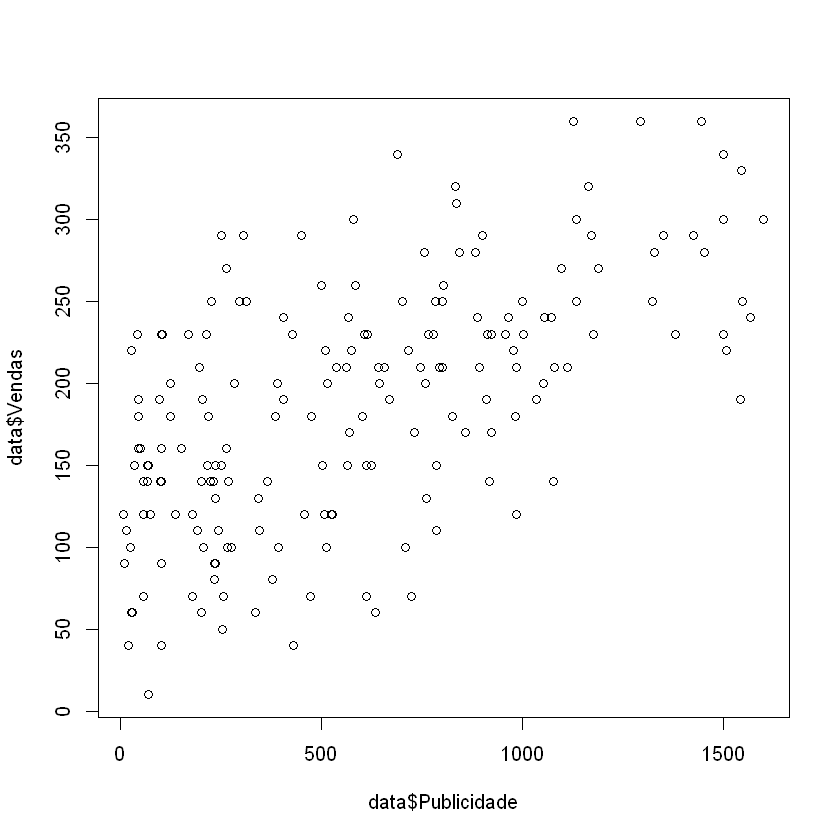

In [8]:
plot(data$Publicidade, data$Vendas)

### Modelo

In [9]:
mod = lm(Vendas ~ Publicidade, data)

### Pressupostos

* Residuals vs Fitted: Resíduos pelos valores previstos. Análise da linearidade e da homocedasticidade.
    * Linearidade: linha vermelha horizontal acompanha a linha tracejada.
    * Homocedasticidade (oposto de Heterocedasticidade): significa o homogeinidade de variâncias. Dispesão dos pontos no gráfico constante ao longo dos valores previstos de 'y'. 
* Normal Q-Q: permite ver se os resíduos tem uma distribuição normal.
    * os resíduos aompanham a linha diagonal pontilhada
* Scale-Location: homocedasticidade.
    * A linha vermelha deve estar aproximadamente vertical e os pontos dispersos de maneira homogênia e retangular.
* Residuals vs Leverage: se existe resíduos outliers e pontos de alavancagem.
    * Valores discrepantes formando pontos de alavancagem, que influenciem a estimação do modelo.
    * Valores fora da faixa 3 e -3.
> https://data.library.virginia.edu/diagnostic-plots/

 

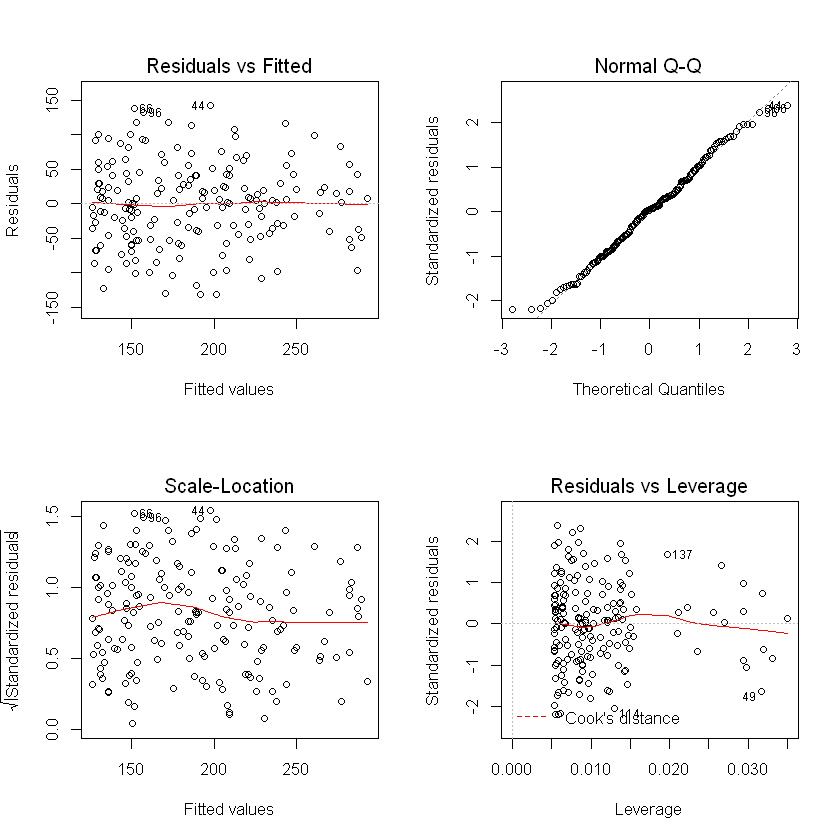

In [10]:
par(mfrow=c(2,2))
plot(mod)

### Testes estatísticos
---
par(mfrow=c(1,1))

### Normalidade dos resíduos: 
* (hipótese nula)  H0: distribuição dos dados = normal -> p > 0.05
* (hipótese alternativa) H1: distribuição dos dados !=normal -> p <= 0.05

In [12]:
shapiro.test(mod$residuals)


	Shapiro-Wilk normality test

data:  mod$residuals
W = 0.99193, p-value = 0.3856


### Outliers nos resíduos:
* média próxima de zero e valores entre 3 e -3

In [13]:
summary(rstandard(mod))

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-2.1981347 -0.7064734  0.0392186 -0.0000075  0.6828619  2.3753897 

### Independência dos resíduos (Durbin-Watson):
* A estatística deve estar próximade 2 e p != 0

In [14]:
durbinWatsonTest(mod)

 lag Autocorrelation D-W Statistic p-value
   1     -0.01039454       1.98891   0.922
 Alternative hypothesis: rho != 0

### Homocedasticidade (Breusch-Pagan)
* H0: há homocedasticidade p > 0.05
* H1: não há homocedasticidade p <= 0.05

In [15]:
bptest(mod)


	studentized Breusch-Pagan test

data:  mod
BP = 1.4245, df = 1, p-value = 0.2327


## Análise do modelo
---
* cada 10 reais gasto em publícidade corresponde a 1 venda.
* R^2: o investimento em publicidade explica 36% das vendas

In [16]:
summary(mod)


Call:
lm(formula = Vendas ~ Publicidade, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-131.840  -42.283    2.344   40.945  142.455 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 125.17951    7.43140   16.84   <2e-16 ***
Publicidade   0.10495    0.01021   10.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60.14 on 185 degrees of freedom
Multiple R-squared:  0.3634,	Adjusted R-squared:   0.36 
F-statistic: 105.6 on 1 and 185 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'


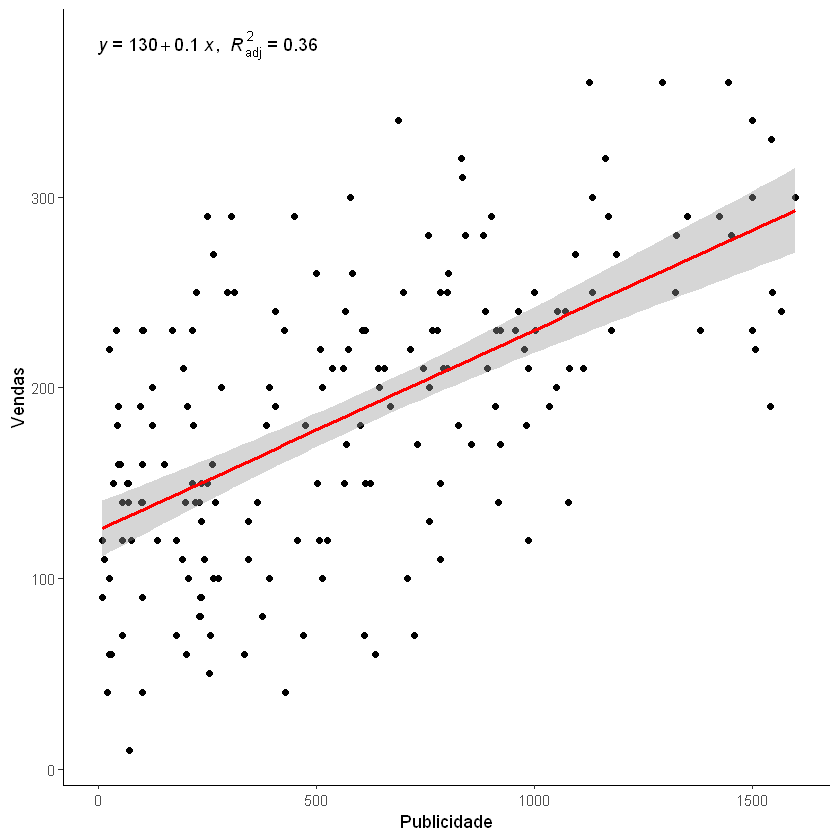

In [25]:
ggplot(data = data, mapping = aes(x=Publicidade, y= Vendas))+
    geom_point()+
    geom_smooth(method = "lm", col = "red")+
    stat_regline_equation(aes(label = paste(..eq.label.., ..adj.rr.label.., sep="*plain(\",\")~~")), label.x = 0, label.y = 380)+
    theme_classic();